# Filtracja

Typy filtrów:

- **dolnoprzepustowy**

![dolnoprzepustowy](../images/dolnoprzepustowy.jpg)

- **gornoprzepustowy**

![gornoprzepustowy](../images/gornoprzepustowy.jpg)

- **pasmowo--zaporowy**

![pasmowozaporowy](../images/pasmowozaporowy.jpg)

- **pasmowo--przepustowy**

![pasmowoprzepustowy](../images/pasmowoprzepustowy.jpg)

### Odwołania do filtrów z pliku aseegg: 
ag.gornoprzepustowy \
ag.dolnoprzepustowy \
ag.pasmowoprzepustowy \
ag.pasmowozaporowy
    
    

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import aseegg as ag

###   Zadanie 1 <img src="../images/pencil.png" width="20" align="left">

Narysuj *nowy_sygnal* w dziedzinie czasu i częstotliwości z użyciem subplotów. 

In [12]:
czest1 = 5
czest2 = 17
czest3 = 31
czestProbkowania = 250
czas = 3


t = np.linspace(0, czas, czas * czestProbkowania)
nowy_sygnal = np.sin(2* np.pi* czest1 *t)+np.sin(2* np.pi*czest2 *t)+np.sin(2* np.pi* czest3 *t)
transformata=ag.FFT(nowy_sygnal)
freq = np.linspace (0, czestProbkowania, czas*czestProbkowania)

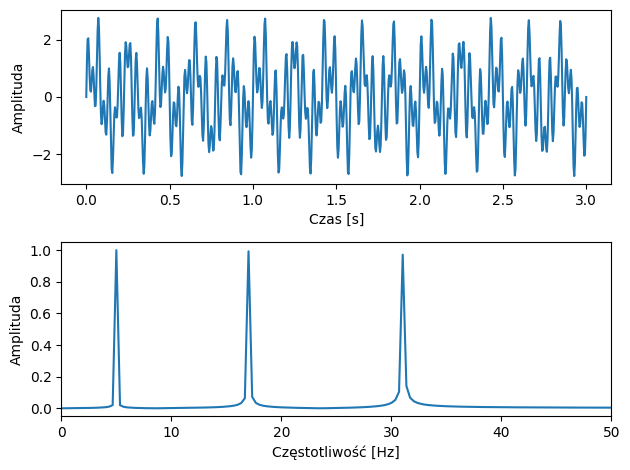

In [28]:
plt.subplot(2, 1, 1)
plt.plot(t, nowy_sygnal)
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.subplot(2, 1, 2)
plt.plot(freq, transformata)
plt.xlim([0,50])
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')

plt.tight_layout()

## Filtracja

In [29]:
przefiltrowany = ag.gornoprzepustowy(nowy_sygnal, czestProbkowania, 10)

## Jak wygląda wcześniej stworzony sygnał "*nowy_sygnal*"  po filtracji? 

(0.0, 40.0)

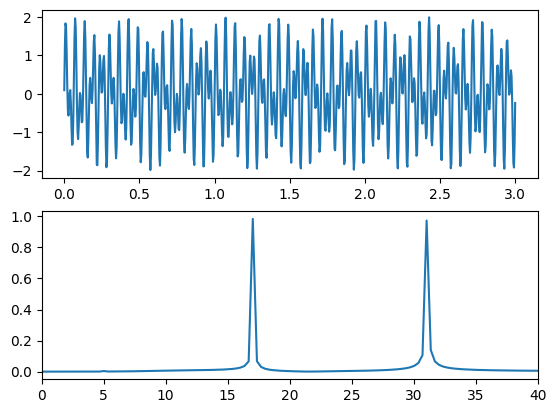

In [30]:
freq = np.linspace(0, czestProbkowania, czas * czestProbkowania)
przefiltrowany_ffted = ag.FFT(przefiltrowany)


plt.subplot(2,1,1)
plt.plot(t, przefiltrowany)

plt.subplot(2,1,2)
plt.plot(freq, przefiltrowany_ffted)
plt.xlim([0,40])

###   Zadanie 2 <img src="../images/pencil.png" width="20" align="left">

Usuń z kolejnego sygnału częstotliwości od 50 do 150Hz. Porównaj sygnały przed i po filtracji w dziedzinach czasu i częstotliwości. 

Kolejność pracy: 
1. Narysuj wykresy sygnału w dziedzinie czasu i częstotliwości. 
2. Wykonaj filtrację sygnału (pierwotnego, nie FFT). 
3. Narysuj wykresy przefitrowanego sygnału w dziedzinie czasu i częstotliwości. 

In [32]:
t = np.linspace(0, 1, 1000)

kolejny_sygnal = np.zeros(1000)
for i in range(20):
    f = i*10
    kolejny_sygnal += np.sin(2*np.pi*f*t)

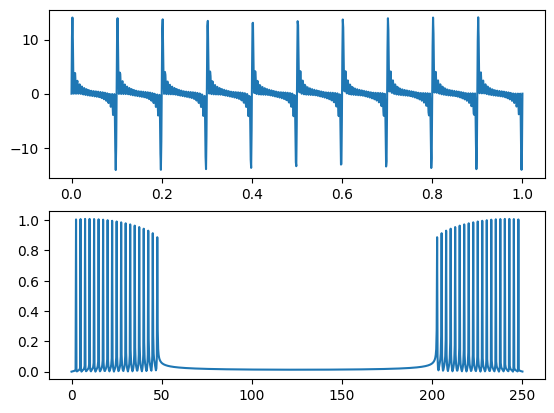

In [55]:
plt.subplot(2,1,1)
plt.plot(t, kolejny_sygnal)

plt.subplot(2,1,2)
transformata=ag.FFT(kolejny_sygnal)
freq = np.linspace(0, 250, 1000)
plt.plot(freq, transformata)
#plt.xlim([0,50])

In [52]:
filtered=ag.pasmowozaporowy(kolejny_sygnal,1000,50,150)

(0.0, 50.0)

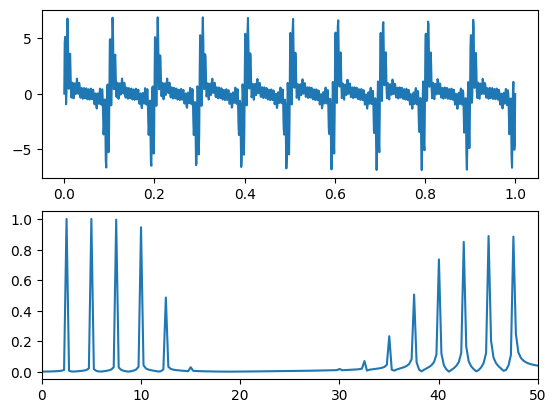

In [56]:
plt.subplot(2,1,1)
plt.plot(t, filtered)

plt.subplot(2,1,2)
transformata=ag.FFT(filtered)
freq = np.linspace(0, 250, 1000)
plt.plot(freq, transformata)
plt.xlim([0,50])

## Praca z prawdziwym sygnałem

###   Zadanie 3 <img src="../images/pencil.png" width="20" align="left">


Pobierz ponownie plik *dane.csv* i wykonaj filtrację sygnału, tak aby usunąć szum związany z urządzeniami elektrycznymi. Częstotliwość próbkowania wynosi 250

In [57]:
dane = np.genfromtxt('dane.csv', delimiter='\n')

(0.0, 50.0)

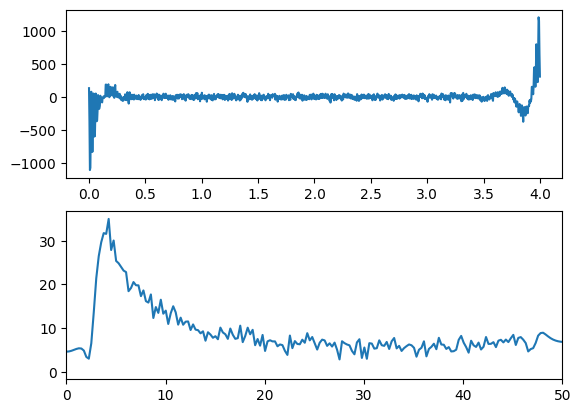

In [73]:
dane_ftd1=ag.gornoprzepustowy(dane,250,3)
dane_ftd=ag.pasmowozaporowy(dane_ftd1,250,47,53)
t=np.linspace(0,4,len(dane))
plt.subplot(2,1,1)
plt.plot(t, dane_ftd)

plt.subplot(2,1,2)
transformata=ag.FFT(dane_ftd)
freq = np.linspace(0, 250, len(dane))
plt.plot(freq, transformata)
plt.xlim([0,50])

Wykonaj filtrację aby usunąć szum poniżej częstotliwości 3Hz oraz szum z gniazdek elektryczynych (50Hz)

Narysuj wykresy w dziedzinie czasu i częstotliwości